# Exploratory Data Analysis of Togetherforher App





About the app

Care program: https://www.togetherforher.com/

The mobile app provides content and information to pregnant women who can take better self-care after consuming the content. The app also allows other features such as tracking their health. 

About the data

There are two sources of data:

1.	Firebase events data:
Log of all the events triggered by the app user 
2.	Forms submissions Data collected by our Saas platform (HealthMachineTM) . This contains the quiz and health tracking information


## Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Datasets

For analysis we are loading two datasets as follows:

1) patient_app_download_status_v2 : This contains data on app downloads.

2) tfh_geographics_data(1): This dataset contains info on geographical data of users.

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Form Submissions/patient_app_download_status_v2.csv")
df.head()

,id,form_code,root_org_id,created_at,updated_at,deleted_at,submitted_at,is_draft,submitted_by_id,activity_id,target_id,target_type,readable_id,episode_of_care_id,source,app_version,platform_os,app_install_date,last_accessed_date
0,141206,dm_form_992_2,1140,2020-10-01 06:42:50.789101,2020-10-01 06:42:50.789101,NaN,2020-10-01 06:42:50.772489,False,30372,NaN,259295,Patient,ZY6-ALB,NaN,health_machine,NaN,NaN,2020-08-14 17:52:25.848,2020-10-01 12:30:51.892
1,141445,dm_form_992_2,1140,2020-10-01 12:23:33.712123,2020-10-01 12:23:33.712123,NaN,2020-10-01 12:23:33.574235,False,30355,NaN,258944,Patient,Q57-7NU,NaN,health_machine,NaN,NaN,2020-08-13 16:44:18.459,2020-10-01 17:53:31.702
2,141476,dm_form_992_2,1140,2020-10-01 12:41:23.312919,2020-10-01 12:41:23.312919,NaN,2020-10-01 12:41:23.299099,False,30013,NaN,256599,Patient,MA8-PEN,NaN,health_machine,NaN,NaN,2020-07-01 18:36:48.985,2020-10-01 18:11:22.425
3,141527,dm_form_992_2,1140,2020-10-01 13:37:49.446179,2020-10-01 13:37:49.446179,NaN,2020-10-01 13:37:49.428142,False,30511,NaN,255944,Patient,R3M-BXW,NaN,health_machine,1.7,android,2020-10-01 17:10:20.619,2020-10-01 19:07:46.704
4,143010,dm_form_992_2,1140,2020-10-06 09:37:29.465205,2020-10-06 09:37:29.465205,NaN,2020-10-06 09:37:29.292756,False,30274,NaN,259034,Patient,IRJ-H6X,NaN,health_machine,NaN,NaN,2020-08-05 21:17:11.582,2020-10-06 15:07:27.799


In [3]:
df1= pd.read_csv("/content/drive/MyDrive/Data USer ID/tfh_geographics_data(1).csv")
df1.head()

,user_id,city,country,region
0,30100,Gurgaon,India,Haryana
1,30100,Sonipat,India,Haryana
2,30145,Meerut,India,Uttar Pradesh
3,30271,Indore,India,Madhya Pradesh
4,30836,Pune,India,Maharashtra


Geographics data contain multiple locations for same user. We will for this analysis will consider only fisrt entry.

### Droping duplicates value of multiple entries for users

In [4]:
df1=df1.drop_duplicates(subset=['user_id'])

### Merging Datasets

In [5]:
df= pd.merge(df,df1,left_on='submitted_by_id', right_on='user_id')
df.head()

,id,form_code,root_org_id,created_at,updated_at,deleted_at,submitted_at,is_draft,submitted_by_id,activity_id,...,episode_of_care_id,source,app_version,platform_os,app_install_date,last_accessed_date,user_id,city,country,region
0,141206,dm_form_992_2,1140,2020-10-01 06:42:50.789101,2020-10-01 06:42:50.789101,NaN,2020-10-01 06:42:50.772489,False,30372,NaN,...,NaN,health_machine,NaN,NaN,2020-08-14 17:52:25.848,2020-10-01 12:30:51.892,30372,Bhopal,India,Madhya Pradesh
1,141727,dm_form_992_2,1140,2020-10-02 04:34:37.128475,2020-10-02 04:34:37.128475,NaN,2020-10-02 04:34:37.116685,False,30372,NaN,...,NaN,health_machine,NaN,NaN,2020-08-14 17:52:25.848,2020-10-02 10:22:41.57,30372,Bhopal,India,Madhya Pradesh
2,150534,dm_form_992_2,1140,2020-10-21 17:59:12.93162,2020-10-21 17:59:12.93162,NaN,2020-10-21 17:59:12.876018,False,30372,NaN,...,NaN,health_machine,NaN,NaN,2020-08-14 17:52:25.848,2020-10-21 23:46:26.612,30372,Bhopal,India,Madhya Pradesh
3,150628,dm_form_992_2,1140,2020-10-22 07:05:25.455521,2020-10-22 07:05:25.455521,NaN,2020-10-22 07:05:25.436249,False,30372,NaN,...,NaN,health_machine,NaN,NaN,2020-08-14 17:52:25.848,2020-10-22 12:52:41.675,30372,Bhopal,India,Madhya Pradesh
4,151029,dm_form_992_2,1140,2020-10-23 05:57:33.844424,2020-10-23 05:57:33.844424,NaN,2020-10-23 05:57:33.816858,False,30372,NaN,...,NaN,health_machine,NaN,NaN,2020-08-14 17:52:25.848,2020-10-23 11:44:54.103,30372,Bhopal,India,Madhya Pradesh


## Descriptive statistics

### Number of rows and columns

In [6]:
print("Number of rows: ",df.shape[0] )
print("Number of columns: ",df.shape[1] )

Number of rows:  25660
Number of columns:  23


### Information of data types and null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  25660 non-null  int64  
 1   form_code           25660 non-null  object 
 2   root_org_id         25660 non-null  int64  
 3   created_at          25660 non-null  object 
 4   updated_at          25660 non-null  object 
 5   deleted_at          0 non-null      float64
 6   submitted_at        25660 non-null  object 
 7   is_draft            25660 non-null  bool   
 8   submitted_by_id     25660 non-null  int64  
 9   activity_id         0 non-null      float64
 10  target_id           25660 non-null  int64  
 11  target_type         25660 non-null  object 
 12  readable_id         25660 non-null  object 
 13  episode_of_care_id  2 non-null      float64
 14  source              25660 non-null  object 
 15  app_version         24348 non-null  float64
 16  plat

Observations:

1) Dataset contains 1 booltype, 4 float64type, 5 int64 type, 13 object type columns

2) Dataset has many missing values

### Summary of dataset

In [8]:
df.describe()

,id,root_org_id,deleted_at,submitted_by_id,activity_id,target_id,episode_of_care_id,app_version,user_id
count,25660.000000,25660.0,0.0,25660.000000,0.0,25660.000000,2.0,24348.000000,25660.000000
mean,202984.624513,1140.0,NaN,32127.966446,NaN,267111.924279,276.0,1.262424,32127.966446
std,28822.542789,0.0,NaN,1327.284666,NaN,5785.353059,0.0,0.277582,1327.284666
min,141175.000000,1140.0,NaN,29831.000000,NaN,255324.000000,276.0,1.100000,29831.000000
25%,181604.250000,1140.0,NaN,31050.000000,NaN,262307.000000,276.0,1.120000,31050.000000
50%,205434.500000,1140.0,NaN,31975.000000,NaN,267776.000000,276.0,1.130000,31975.000000
75%,227459.500000,1140.0,NaN,33062.500000,NaN,270358.000000,276.0,1.140000,33062.500000
max,250348.000000,1140.0,NaN,35296.000000,NaN,278489.000000,276.0,1.900000,35296.000000


## Handling missing values and columns

### Droping columns with Nan Values

In [9]:
df.drop(columns=['deleted_at','activity_id','episode_of_care_id'],inplace=True)

### Handling missing values

In [10]:
df.isna().sum()

id                       0
form_code                0
root_org_id              0
created_at               0
updated_at               0
submitted_at             0
is_draft                 0
submitted_by_id          0
target_id                0
target_type              0
readable_id              0
source                   0
app_version           1312
platform_os           1312
app_install_date       620
last_accessed_date       0
user_id                  0
city                  1664
country                252
region                 272
dtype: int64

Percentage of missing values

In [11]:
df.isna().sum()/df.count()*100

id                    0.000000
form_code             0.000000
root_org_id           0.000000
created_at            0.000000
updated_at            0.000000
submitted_at          0.000000
is_draft              0.000000
submitted_by_id       0.000000
target_id             0.000000
target_type           0.000000
readable_id           0.000000
source                0.000000
app_version           5.388533
platform_os           5.388533
app_install_date      2.476038
last_accessed_date    0.000000
user_id               0.000000
city                  6.934489
country               0.991814
region                1.071372
dtype: float64

From above analysis we can see that city contains most number of missing values followed by app_version and platform_os. Other columns that contain missing values are country ,region and app_install date

### Using Fillna to fill missing values

In [12]:
df['city'].fillna(method = 'ffill', inplace=True)
df['country'].fillna(method = 'ffill', inplace=True)

In [13]:
df.isna().sum()

id                       0
form_code                0
root_org_id              0
created_at               0
updated_at               0
submitted_at             0
is_draft                 0
submitted_by_id          0
target_id                0
target_type              0
readable_id              0
source                   0
app_version           1312
platform_os           1312
app_install_date       620
last_accessed_date       0
user_id                  0
city                     0
country                  0
region                 272
dtype: int64

Dropping the remaining missing values as data loss is around 5%

In [14]:
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23474 entries, 39 to 25656
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  23474 non-null  int64  
 1   form_code           23474 non-null  object 
 2   root_org_id         23474 non-null  int64  
 3   created_at          23474 non-null  object 
 4   updated_at          23474 non-null  object 
 5   submitted_at        23474 non-null  object 
 6   is_draft            23474 non-null  bool   
 7   submitted_by_id     23474 non-null  int64  
 8   target_id           23474 non-null  int64  
 9   target_type         23474 non-null  object 
 10  readable_id         23474 non-null  object 
 11  source              23474 non-null  object 
 12  app_version         23474 non-null  float64
 13  platform_os         23474 non-null  object 
 14  app_install_date    23474 non-null  object 
 15  last_accessed_date  23474 non-null  object 
 16  use

## Checking number of unique values in each column

In [16]:
for i in df.columns:
  print (i,df[i].nunique())
  print()

id 23474

form_code 1

root_org_id 1

created_at 23474

updated_at 23474

submitted_at 23474

is_draft 1

submitted_by_id 2379

target_id 2379

target_type 1

readable_id 23474

source 1

app_version 9

platform_os 2

app_install_date 2932

last_accessed_date 23474

user_id 2379

city 211

country 7

region 39



Let's drop the columns with only 1 unique values. Addition to that we will be dropping 'created_at', 	'updated_at', 'user_id',	'submitted_at' columns which are not useful for our analysis.

In [17]:
df.drop(columns=['form_code', 'root_org_id','source','is_draft','target_type', 'created_at', 	'updated_at', 'user_id',	'submitted_at'],axis=1,inplace=True)

## Adding Date Time columns

The dataset contains app_install_date,	last_accessed_date columns. The date and time format is not much useful for our analysis. So we will extract year-month, number of usage hours before last accessing time of app and year of installation.

In [18]:
df['install_month_year'] = pd.to_datetime(df['app_install_date']).dt.strftime('%Y-%m')
df['lastuse_month_year'] = pd.to_datetime(df['last_accessed_date']).dt.strftime('%Y-%m')
df['Installed_hrs'] = ((pd.to_datetime(df['last_accessed_date'])-pd.to_datetime(df['app_install_date'])).dt.seconds)/3600
df['install_year'] = pd.to_datetime(df['app_install_date']).dt.year


In [19]:
df.head()

,id,submitted_by_id,target_id,readable_id,app_version,platform_os,app_install_date,last_accessed_date,city,country,region,install_month_year,lastuse_month_year,Installed_hrs,install_year
39,141527,30511,255944,R3M-BXW,1.7,android,2020-10-01 17:10:20.619,2020-10-01 19:07:46.704,Bengaluru,India,Karnataka,2020-10,2020-10,1.957222,2020
40,141406,30511,255944,NH2-3GP,1.7,android,2020-10-01 17:10:20.619,2020-10-01 17:11:27.78,Bengaluru,India,Karnataka,2020-10,2020-10,0.018611,2020
41,142938,30511,255944,EQA-KG6,1.7,android,2020-10-01 17:10:20.619,2020-10-06 11:03:31.873,Bengaluru,India,Karnataka,2020-10,2020-10,17.886389,2020
42,143112,30511,255944,TD4-6AW,1.7,android,2020-10-01 17:10:20.619,2020-10-06 17:17:09.531,Bengaluru,India,Karnataka,2020-10,2020-10,0.113333,2020
43,143959,30511,255944,QGV-8ZB,1.7,android,2020-10-01 17:10:20.619,2020-10-08 10:25:46.159,Bengaluru,India,Karnataka,2020-10,2020-10,17.256944,2020


## Exploratory data anlysis

### Checking the most preferred os platform

In [20]:
df['platform_os'].value_counts()

android    22450
ios         1024
Name: platform_os, dtype: int64

In [21]:
df['platform_os'].value_counts()/df['platform_os'].count()*100

android    95.637727
ios         4.362273
Name: platform_os, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


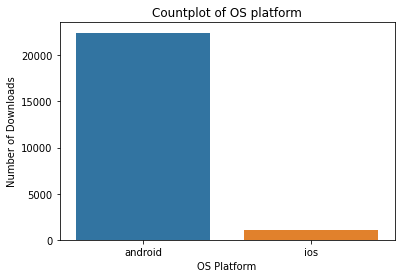

In [22]:
sns.countplot(df['platform_os'])
plt.title("Countplot of OS platform")
plt.xlabel('OS Platform')
plt.ylabel('Number of Downloads')
plt.show()

Observations:

1) Number of installations on android platform is more than ios.

2) The app is downloaded on android 22450 times while on ios is 1024 which is only 4.36%.

### Checking installations as per app vaerions

In [23]:
df['app_version'].value_counts()

1.12    9706
1.14    4766
1.13    2400
1.90    1989
1.70    1447
1.10    1237
1.80    1212
1.11     715
1.15       2
Name: app_version, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


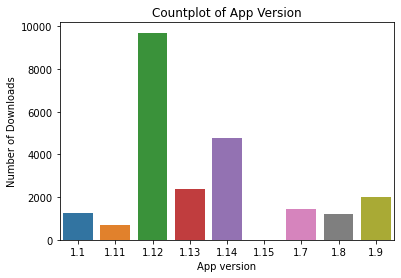

In [24]:
sns.countplot(df['app_version'])
plt.title("Countplot of App Version")
plt.xlabel('App version')
plt.ylabel('Number of Downloads')
plt.show()

The most installed app version is 1.12 followed by 1.14.

### Checking installations for year 2020 & 2021

In [25]:
df['install_year'].value_counts()

2020    15490
2021     7984
Name: install_year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


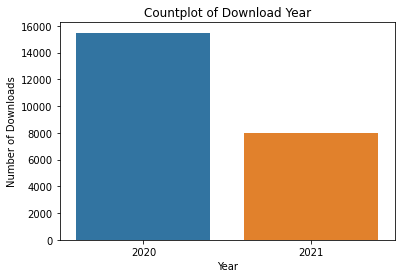

In [26]:
sns.countplot(df['install_year'])
plt.title("Countplot of Download Year")
plt.xlabel('Year')
plt.ylabel('Number of Downloads')
plt.show()

Observations:

1) The number of downloads in 2020 are more than 2021. But data for 2021 is for 8 months and for 2021 is of just 2 months.

2) Number of installations in 2020 are  15490 & in 2021 are 7984

### Number of dowanloads monthwise

In [27]:
df['install_month_year'].value_counts()

2020-12    8220
2021-01    4881
2020-11    3216
2021-02    3103
2020-10    1877
2020-09    1040
2020-08     866
2020-07     174
2020-06      94
2020-05       3
Name: install_month_year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


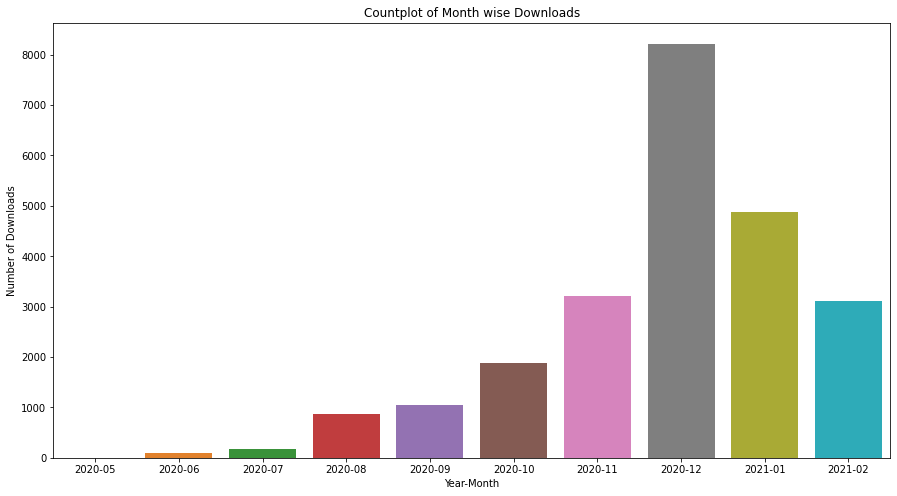

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(df['install_month_year'].sort_values())
plt.title("Countplot of Month wise Downloads")
plt.xlabel('Year-Month')
plt.ylabel('Number of Downloads')
plt.show()

Observations:

1) In December 2020 most number of installations are done 7813.

2) There was un upwards trend in intallations from May-2020 to December-2020. After that download trend is downward.

#### Installations platform os wise

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


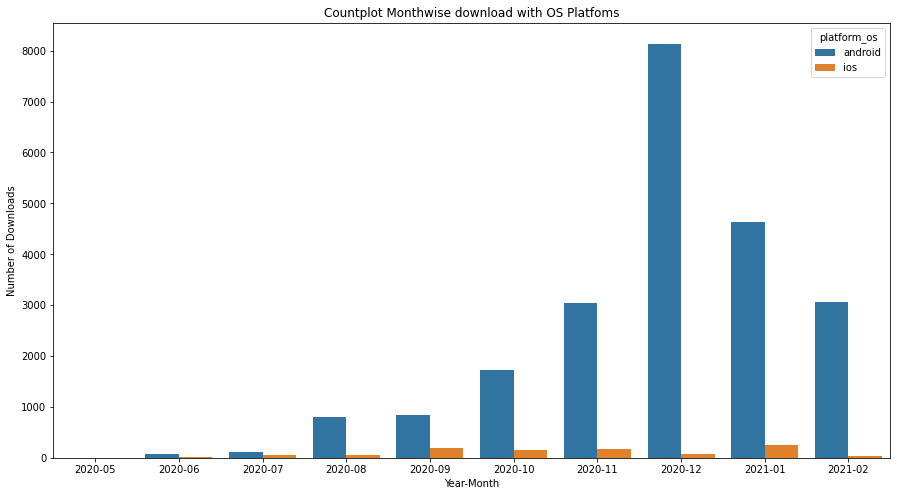

In [29]:
plt.figure(figsize=(15,8))
sns.countplot(df['install_month_year'].sort_values(),hue=df['platform_os'])
plt.title("Countplot Monthwise download with OS Platfoms")
plt.xlabel('Year-Month')
plt.ylabel('Number of Downloads')
plt.show()

Observation:

1) The total installations trends are replicated for andriod platform.

2) The installations trend for ios platform is generally upwards with exceptions for month Dec-2020 and Feb-2021.

### Number of active useres monthwise.

In [30]:
df['lastuse_month_year'].value_counts()

2021-01    7511
2020-12    6455
2021-02    6298
2020-11    2314
2020-10     896
Name: lastuse_month_year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


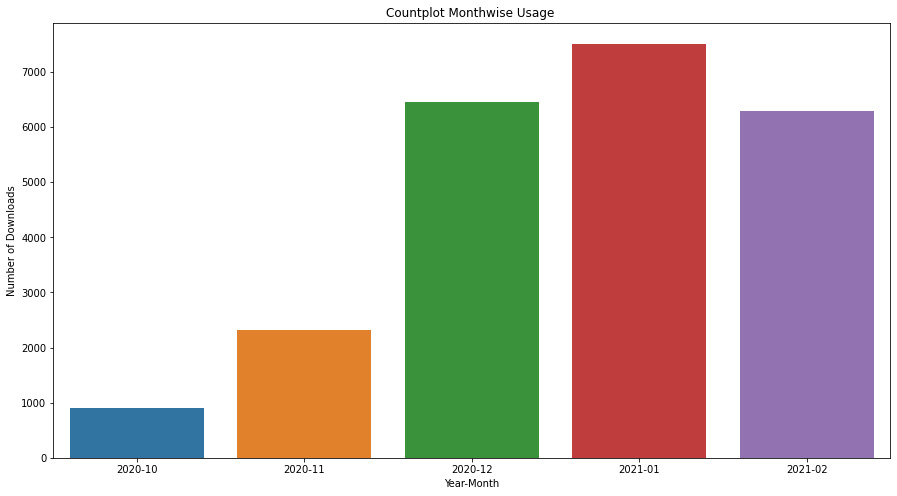

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(df['lastuse_month_year'].sort_values())
plt.title("Countplot Monthwise Usage ")
plt.xlabel('Year-Month')
plt.ylabel('Number of Downloads')
plt.show()

For this analysis we used data from lastuse_month_year column.

Observations:

1) Number of active usage was most in Jan-2020 with 7511. The trend is generally upward.

2) In Februry the usage was down to 6298.

#### Platform wise usage

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


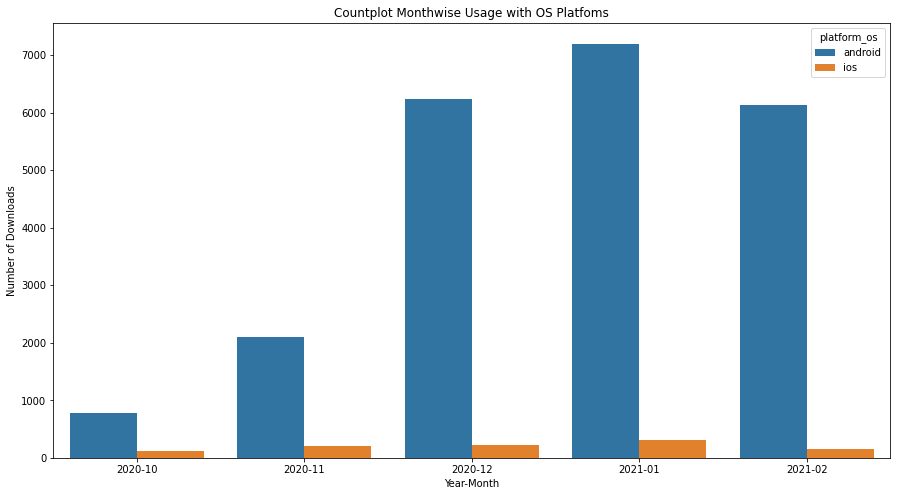

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(df['lastuse_month_year'].sort_values(),hue = df['platform_os'])
plt.title("Countplot Monthwise Usage with OS Platfoms")
plt.xlabel('Year-Month')
plt.ylabel('Number of Downloads')
plt.show()

Observation:

This plot replicates the same obseravtion on usage trend as total number of active users month wise

### Boxplot on Installed Hours

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


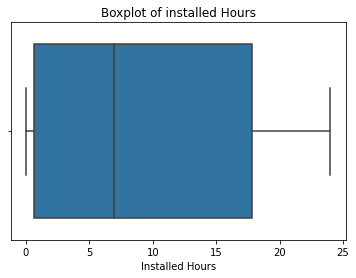

In [33]:
sns.boxplot(df['Installed_hrs'])
plt.title("Boxplot of installed Hours")
plt.xlabel('Installed Hours')
plt.show()

In [34]:
df['Installed_hrs'].describe()

count    23474.000000
mean         9.332183
std          8.486892
min          0.000000
25%          0.650417
50%          6.925556
75%         17.818611
max         23.998889
Name: Installed_hrs, dtype: float64

Observations:

1) The maximum value of intalled hours is 24 hours while minmum is 0 hrs.

2) The median of intalled hours is 6.92 hrs and mean is 9.33 hours.



### Top 15 Cities downloadwise

In [35]:
df['city'].value_counts()[:15]

Pune                3002
Indore              1471
Mumbai              1232
Ahmedabad           1178
Pimpri-Chinchwad     968
Jaipur               966
Lucknow              933
Patna                906
Delhi                874
Agra                 868
Meerut               659
Aligarh              512
Bhopal               501
Bengaluru            409
Raipur               374
Name: city, dtype: int64

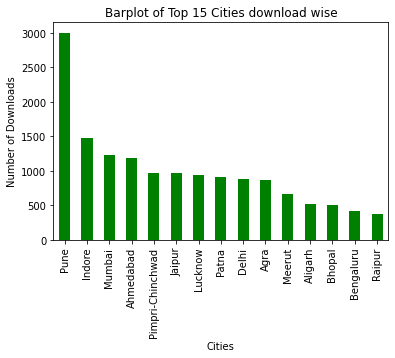

In [36]:
df['city'].value_counts()[:15].plot(kind='bar', colormap='ocean')
plt.title("Barplot of Top 15 Cities download wise")
plt.xlabel('Cities')
plt.ylabel('Number of Downloads')
plt.show()

Observations:

1) The app was downloaded most in Pune City. Follwoeed by Indore Ahmedabad, Mumbai and Pimpari Chinchwad.

2) The most downloads in pune were 3000.

### Top 15 Regions download wise

In [37]:
df['region'].value_counts()[:15]

Maharashtra       6798
Uttar Pradesh     4602
Madhya Pradesh    2536
Gujarat           1544
Rajasthan         1146
Bihar             1096
Delhi              993
Haryana            663
Uttarakhand        543
Chhattisgarh       510
West Bengal        400
Karnataka          391
Punjab             369
Kerala             334
Telangana          284
Name: region, dtype: int64

Text(0, 0.5, 'Number of Downloads')

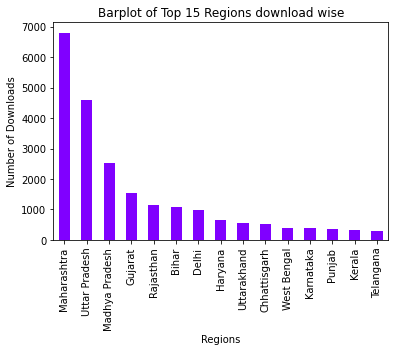

In [38]:
df['region'].value_counts()[:15].plot(kind='bar', colormap='rainbow')
plt.title("Barplot of Top 15 Regions download wise")
plt.xlabel('Regions')
plt.ylabel('Number of Downloads')

Observations:

1) Maharshtra had most downloads in the region columns. Followed by Uttar Pradesh, Madhya Pradesh, Gujrat and Rajashan completing top 5 spaces.

2) Mahrashtra had most downloads of 6798. While Uttar Pradesh had 4602 downloads.

### Country wise downloads data

In [39]:
df['country'].value_counts()

India                   23193
United Kingdom            161
France                     69
United States              27
Netherlands                10
Malawi                      9
United Arab Emirates        5
Name: country, dtype: int64

Text(0, 0.5, 'Number of Downloads')

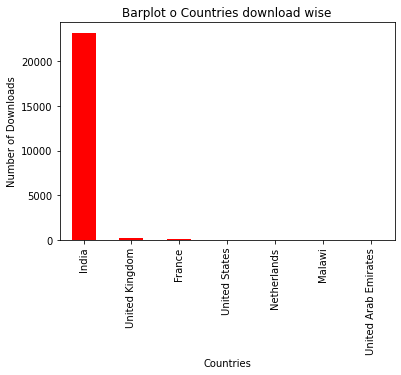

In [40]:
df['country'].value_counts().plot(kind='bar', colormap='prism')
plt.title("Barplot o Countries download wise")
plt.xlabel('Countries')
plt.ylabel('Number of Downloads')

Observation:

most of the downloads were from India only. But there were total 6 other countries from where app was downloaded in small numbers.

## Conslusions:

1) The app was downloaded for 25660 times for anlysis we considered 23474 after data processing.

2) App was dowloaded most in Pune in city category and in Maharshtra in Region category.

3) Most of the useres are from India while there is a small presence in 6 other countries

4) The number of unique users was 2379.

5) The app download trend was generally upward with recent months showing downward trend.

6) The total usge hours is max 24 hours with average of 9 hours.

7) Andriod platform had most downloads than ios platform and difference is huge as ios is just 4% of total downloads.